# **TF-IDF(단어 빈도-역 문서 빈도)**  
- 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법이다.
- 우선 DTM을 만든 후, TF-IDF 가중치를 부여한다.
- TF-IDF는 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰일 수 있다.

**TF-IDF는 TF와 IDF를 곱한 값을 의미한다.**  
- tf(d, t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수
- df(t) : 특정 단어 t가 등장한 문서의 수
- idf(d, t) : df(t)에 반비례하는 수  
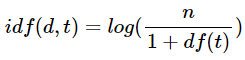  
log를 씌어주지 않으면 희귀 단어들에 엄청난 가중치가 부여될 수 있다. 
로그를 씌우면 이런 격차를 줄이는 효과가 있다.  
log 안의 식에서 분모에 1을 더해주는 이유는 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지하기 위함이다.  

**TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단되며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단한다.**  
즉, the나 a와 같이 불용어의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 된다.

# **파이썬으로 TF-IDF 직접 구현하기**

In [1]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

In [2]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
]

vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [3]:
# 총 문서의 수
N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [6]:
## TF 구하기
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [7]:
## IDF 구하기
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [8]:
## TF-IDF 행렬 출력
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


# **사이킷런을 이용한 DTM과 TF-IDF 실습**

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
## CountVectorizer를 사용해서 DTM 만들기
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


사이킷런은 TF-IDF를 자동 계산해주는 TfidfVectorizer를 제공한다.  
**IDF의 로그항의 분자에 1을 더해주며, 로그항에 1을 더해주고, TF-IDF에 L2 정규화라는 방법으로 값을 조정하는 등의 차이로 TF-IDF가 가진 의도는 여전히 그대로 갖고 있다.**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
